In [1]:
%run -t ../src/karplus_angles.py

Cargando: ../data/structures.csv ... OK!
Cargando: ../data/train.csv ... OK!
Armando struct_dict OK!
 Filtrando 3JHC
Cantidad de datos en ds_trn_f: 1510379


/work/molecules/src/sfuncs.py:342: RuntimeWarning: invalid value encountered in double_scalars
  cos0 =  np.dot(n1, n2) / (norm(n1) * norm(n2))        # Cos( Angle_between_planes )


 Done (0, 1510379), ELP=237.67s

IPython CPU timings (estimated):
  User   :     242.68 s.
  System :       1.70 s.
Wall time:     243.32 s.


In [2]:
ret_d_trn.keys()

dict_keys(['idx_v', 'C0C1_dist_v', 'cos_coupling_v', 'H0_neighbours_dist_v', 'H1_neighbours_dist_v', 'neighbours_atoms_v'])

In [3]:
ret_d_trn["cos_coupling_v"].shape

(1510379, 3)

In [4]:
diedral_cos = ret_d_trn["cos_coupling_v"][:,0]
#diedral_ang = np.acos()

In [9]:
diedral_cos[np.isnan(diedral_cos)]

array([nan, nan])

In [5]:
plt.style.use('dark_background')

/home/jim/anaconda/envs/kgg_mole/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jim/anaconda/envs/kgg_mole/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


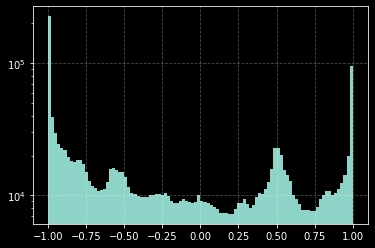

In [6]:
plt.hist(diedral_cos, bins=100, log=1);
plt.grid(ls='--', alpha=0.3)

In [7]:
ds_trn_f["scalar_coupling_constant"].shape

(1510379,)

In [8]:
g = ds_trn_f["scalar_coupling_constant"]

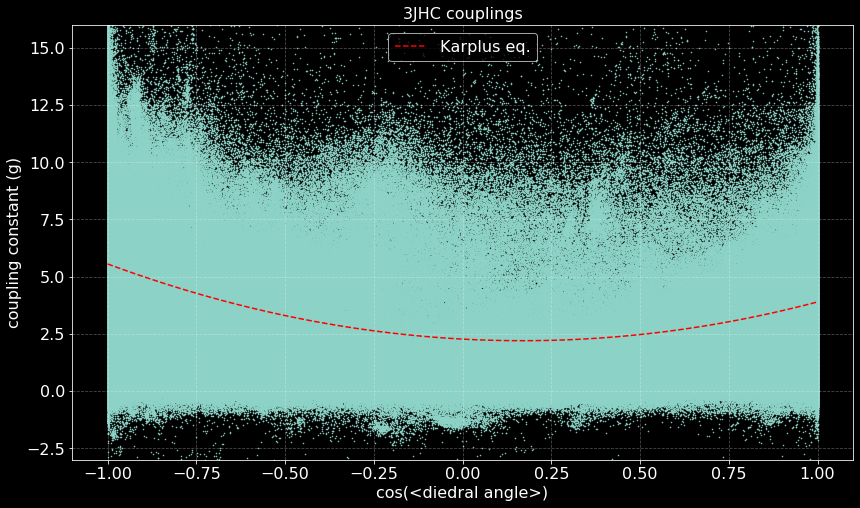

In [13]:
plt.figure(figsize=(14,8))
plt.scatter(diedral_cos, g, s=0.3)

# define a domain
cc = ~np.isnan(diedral_cos) # np.ones(diedral_cos.size, dtype=np.bool) # ~np.isnan(diedral_cos)
x = np.linspace(diedral_cos[cc].min(), diedral_cos[cc].max(), 100)

# Karplus fit
pfit = np.polyfit(diedral_cos[cc], g[cc], deg=2)
plt.plot(x, pfit[0]*x**2 + pfit[1]*x + pfit[2], '--r', label='Karplus eq.')

# higher polynomial (not worth it actually)
#pfit_hi = np.polyfit(diedral_cos, g, deg=9)
#plt.plot(x, np.dot(pfit_hi, [x**n for n in range(pfit_hi.size)]), '--b', label='higher polynomial')

plt.grid(ls='--', alpha=.3)
plt.ylabel("coupling constant (g)", fontsize=16)
plt.xlabel("cos(<diedral angle>)", fontsize=16)
plt.title("3JHC couplings", fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(loc='best', fontsize=16)
plt.ylim(-3, 16);